# A Programme for Basic EDA Process
- Doing the Basic EDA over and over again is really boring and discoraging. Some time I have some descent ideas or projects that I want to do, but thinking about all little boring (yet importatnt) basic things makes me tired. And here we go, a Basic Programme yet powerful here to solve the problem!
- I will try writing functions in this Notebook first, since it can be easily debugged, then copy them into a different `.py` file, which is the final Programme.
- I will used this as a reference - I think it basically contains everything I need for now.
<img src='./images/eda-process-reference.jpg'/>

In [3]:
# Import essential packages
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
class EDABasics:
    def __init__(self, df, level=0):
        self.df = df
        self.level = level
    def rename_columns(self, case='none', columns=[]):
        """
        Rename Data's Column names into desired names (or case style)
        Parameters:
          case: The desired case, can be none (for no update), camelCase, PascalCase, snake_case, SNAKE_CASE and kebal-case (each case need to be written in its case style).
          columns: list of columns name. If this is set, the programme will use it to name the columns instead of changing case style.
          
        """
        # Change to desired name
        if columns != [] and len(columns) == len(self.df.columns):
            # Strim abundant spaces before using
            [col.strip() for col in columns]
            self.df.columns = columns
        
        # Change to desired case style
        else: 
            col_names = self.df.columns
            [col_name.strip() for col_name in col_names]
            
            if case == 'camelCase' or case == 'PascalCase':
                # Upper first character of each word
                col_names = [col_name.title() for col_name in col_names]
                # Lower the first Character if it's camelCase
                if case == 'camelCase':
                    col_names = [col_name[0].lower() + col_name[1:] for col_name in col_names]
                # remove spaces
                col_names = [col_name.replace(' ', '') for col_name in col_names]

            elif case == 'snake_case' or case == 'kebal-case':
                col_names = [col_name.lower() for col_name in col_names]
                # replace spaces with delimiter
                if case == 'snake_case':
                    col_names = [col_name.replace(' ', '_') for col_name in col_names]
                else:
                    col_names = [col_name.replace(' ', '-') for col_name in col_names]

            elif case == 'SNAKE_CASE': 
                col_names = [col_name.upper() for col_name in col_names]
                # replace spaces with delimiter
                col_names = [col_name.replace(' ', '_') for col_name in col_names]

            self.df.columns = col_names
            
    def show_data_info(self, ):
        print('Number of Rows: {}'.format(self.df.shape[0]))
        print('Number of Cols: {}'.format(self.df.shape[1]))
        self.df.info()
            
    def run(self, ):
        # Rename Process
        print('Run Rename Process...')
        self.case = input('Which Case? ')
        self.rename_columns(case = self.case)
        
        # Showing Basic Data Info Process
        print('Showing Data Information...')
        self.show_data_info()

In [5]:
df = pd.read_csv('./datasets/test.csv')

In [6]:
df

,col1 sth,col2 sth,col3 sth,col3 sth.1
0,12,long,3,1
1,44,short,55,2
2,7,shortter,2,3
3,42,nothing,33,4


In [7]:
eda = EDABasics(df.copy())

In [8]:
eda.run()

Run Rename Process...
Which Case? 
Showing Data Information...
Number of Rows: 4
Number of Cols: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   col1 sth    4 non-null      int64 
 1   col2 sth    4 non-null      object
 2   col3 sth    4 non-null      int64 
 3   col3 sth.1  4 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 256.0+ bytes


In [10]:
df.describe()

,col1 sth,col3 sth,col3 sth.1
count,4.000000,4.00000,4.000000
mean,26.250000,23.25000,2.500000
std,19.465782,25.59134,1.290994
min,7.000000,2.00000,1.000000
25%,10.750000,2.75000,1.750000
50%,27.000000,18.00000,2.500000
75%,42.500000,38.50000,3.250000
max,44.000000,55.00000,4.000000


In [14]:
ti_df = pd.read_csv('./datasets/titanic_train.csv')

In [15]:
ti_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:ylabel='Frequency'>

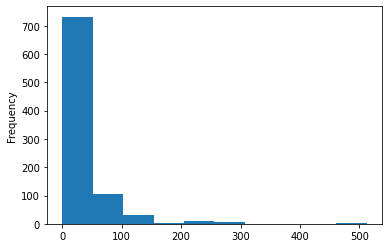

In [16]:
ti_df['Fare'].plot(kind='hist', )

In [20]:
# Identify plotable Columns
plot_count = len([df[col].dtype])

for col in ti_df.columns:
    print(len(ti_df[col].unique()), ti_df[col].dtype)
    # Number Attribute with lots of unique values (> 10) => Histogram
    if ti_df[col].dtype != 'object' and len(ti_df[col].unique()) > 10:
        # 

891 int64
2 int64
3 int64
891 object
2 object
89 float64
7 int64
7 int64
681 object
248 float64
148 object
4 object
